<a href="https://colab.research.google.com/github/Aiswaryabinu/svm/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
x=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [21]:
#training of svm
model=SVC()
model.fit(x_train,y_train)

SVC()

In [22]:
y_pred = model.predict(x_test)
print(accuracy_score(y_test, y_pred))

0.6228070175438597


The parameters in DecisionBoundaryDisplay.from_estimator specify the trained model, the data used for fitting, how the decision boundary is calculated from the model's output, the color scheme for the regions, and the transparency of those regions.

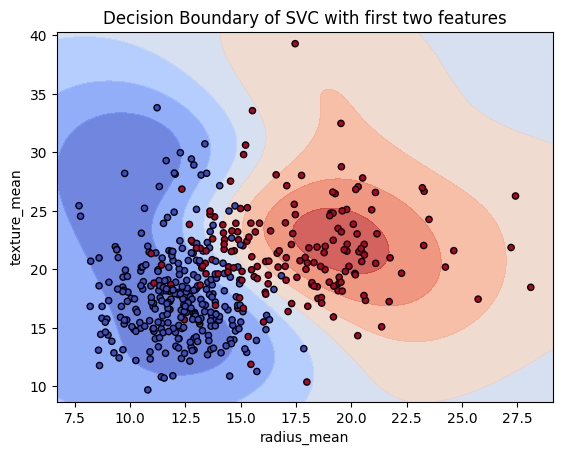

In [30]:

X_train_2d = x_train[['radius_mean', 'texture_mean']]
model_2d = SVC()
model_2d.fit(X_train_2d, y_train)
DecisionBoundaryDisplay.from_estimator(
    model_2d, X_train_2d, response_method="decision_function", cmap=plt.cm.coolwarm, alpha=0.8
)
plt.scatter(X_train_2d['radius_mean'], X_train_2d['texture_mean'], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.title('Decision Boundary of SVC with first two features')
plt.show()

In [34]:
#for rbf kernal
model_rbf = SVC(kernel='rbf')
model_rbf.fit(x_train, y_train)

SVC()

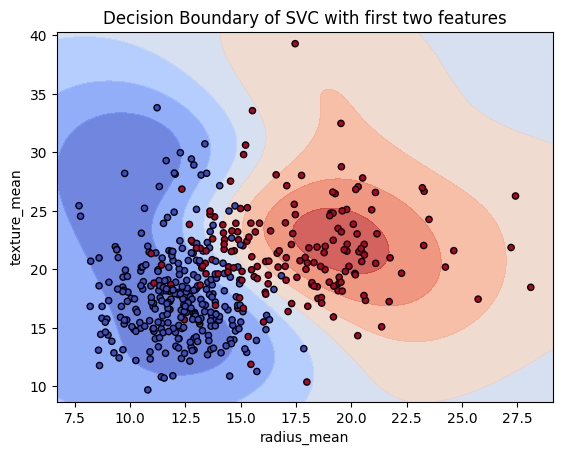

In [36]:
#decision boundary display
X_train_2d = x_train[['radius_mean', 'texture_mean']]
model_2d = SVC(kernel='rbf')
model_2d.fit(X_train_2d, y_train)
DecisionBoundaryDisplay.from_estimator(
    model_2d, X_train_2d, response_method="decision_function", cmap=plt.cm.coolwarm, alpha=0.8
)
plt.scatter(X_train_2d['radius_mean'], X_train_2d['texture_mean'], c=y_train, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.title('Decision Boundary of SVC with first two features')
plt.show()


In [37]:
#tuning of hyperparameters c and gamma
model_tuned = SVC(C=10, gamma=0.1)
model_tuned.fit(x_train, y_train)




SVC(C=10, gamma=0.1)

In [40]:
#cross-validation

scores = cross_val_score(model_tuned, x_train, y_train, cv=5)
print(scores)


[0.63736264 0.62637363 0.62637363 0.62637363 0.62637363]
